# HR Employee Attrition – Análisis y Modelo de Clasificación

## Introducción
La rotación de personal (*attrition*) impacta en costos de reclutamiento, pérdida de conocimiento y productividad. Este proyecto busca **entender los factores asociados a la renuncia** y **construir un modelo que estime la probabilidad de attrition** a nivel individuo.

**Dataset:** `data/HR-Employee-Attrition.csv` (IBM HR Analytics – datos sintéticos para uso educativo, ~1.470 filas y ~35 columnas con variables demográficas, de satisfacción, desempeño y antigüedad).

## Preguntas guía
- ¿Qué variables se asocian más con el attrition? (ej.: `OverTime`, `MonthlyIncome`, `YearsAtCompany`, `JobRole`)
- ¿Existen segmentos con mayor riesgo? (combinaciones de satisfacción, viaje, antigüedad)
- ¿Podemos predecir la renuncia con un desempeño útil para negocio?

## Objetivos
**Analíticos (EDA):**
- Explorar distribución de variables, valores faltantes y outliers.
- Detectar relaciones (bivariadas/multivariadas) relevantes con `Attrition`.

**Modelado (ML):**
- Entrenar un **árbol de decisión** como baseline y comparar con **Random Forest** y **Regresión Logística**.
- Abordar **desbalanceo de clases** (p.ej., `class_weight` o `SMOTE`).
- Evaluar con **ROC-AUC**, **Recall** y **F1** de la clase *Attrition = Yes*.

**Interpretabilidad:**
- Importancia de variables del modelo y, opcionalmente, **SHAP** para explicar predicciones.

## Alcance y supuestos
- Datos sintéticos, útiles para aprendizaje y demostración en portfolio.
- No se incluyen datos personales reales ni información sensible.

## Reproducibilidad
- Requisitos en `requirements.txt`.
- Dataset público incluido en `data/HR-Employee-Attrition.csv`.
- Semillas aleatorias fijadas cuando corresponda.

---

**Estructura del notebook (iterativa):**  
1) EDA → 2) Preprocesamiento → 3) Modelos → 4) Métricas → 5) Interpretabilidad → 6) Conclusiones.

# 1. Carga e inspección inicial de los datos
En esta sección se importa el dataset y se realiza una primera exploración general.  
El objetivo es verificar la estructura, tipos de datos, valores nulos o duplicados,  
y obtener una visión preliminar del contenido antes del análisis detallado.

In [160]:
# --- Importaciones principales ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [124]:
# --- Configuración visual ---
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')
pd.set_option('display.max_columns', None)

In [125]:
# --- Carga de datos ---
df = pd.read_csv("data/HR_Employee_Attrition.csv")

In [126]:
# --- Vista general y estructura ---
df.head()
print("\nDimensiones:", df.shape)
df.info()


Dimensiones: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14 

In [127]:
# --- Vista general y estructura ---
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [128]:
print("\nDimensiones:", df.shape)
df.info()


Dimensiones: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14 

In [129]:
# --- Calidad de datos ---
nulos = df.isnull().sum().sort_values(ascending=False)
print("Valores nulos por columna:\n")
print(nulos.to_string())

duplicados = df.duplicated().sum()
print(f"\nFilas duplicadas: {duplicados}")

Valores nulos por columna:

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel    

In [130]:
# --- Estadísticas generales ---
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [131]:
# --- Variable objetivo y cardinalidad ---
print("\nDistribución de 'Attrition':")
print(df['Attrition'].value_counts())

print("\nCantidad de valores únicos por columna:")
print(df.nunique().sort_values(ascending=False))


Distribución de 'Attrition':
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Cantidad de valores únicos por columna:
EmployeeNumber              1470
MonthlyRate                 1427
MonthlyIncome               1349
DailyRate                    886
HourlyRate                    71
Age                           43
TotalWorkingYears             40
YearsAtCompany                37
DistanceFromHome              29
YearsInCurrentRole            19
YearsWithCurrManager          18
YearsSinceLastPromotion       16
PercentSalaryHike             15
NumCompaniesWorked            10
JobRole                        9
TrainingTimesLastYear          7
EducationField                 6
JobLevel                       5
Education                      5
StockOptionLevel               4
JobInvolvement                 4
JobSatisfaction                4
WorkLifeBalance                4
EnvironmentSatisfaction        4
RelationshipSatisfaction       4
BusinessTravel                 3
Department 

## Eliminación de variables sin valor explicativo

Antes del análisis exploratorio y posterior modelado, se eliminan las variables que no aportan información relevante para predecir la variable objetivo `Attrition`.  
A partir del análisis de la cantidad de valores únicos por columna, se observa que algunas variables son constantes o identificadoras, por lo que carecen de valor predictivo.

Las variables eliminadas son:

- **EmployeeNumber:** identificador único de cada empleado (sin relación con la rotación).  
- **EmployeeCount:** solo un valor único en toda la columna.  
- **StandardHours:** constante para todos los registros.  
- **Over18:** también constante, dado que todos los empleados son mayores de edad.  

Estas variables no tienen potencial explicativo y se eliminan del dataset antes del modelado.

In [132]:
cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
df = df.drop(columns=cols_to_drop)

In [133]:
# Verificación rápida tras la eliminación
print("Dimensiones después de eliminar columnas:", df.shape)

Dimensiones después de eliminar columnas: (1470, 31)


# 2. Preparación y transformación de variables
En esta sección se realiza el preprocesamiento inicial del dataset.  
Se revisa la variable objetivo **Attrition** y se la convierte a formato numérico (1 = Yes, 0 = No),  
dejando el conjunto de datos listo para el análisis exploratorio y el modelado posterior.

## Transformación de variables dicotómicas

En esta etapa se convierten las variables categóricas binarias (con valores `Yes/No` o `Male/Female`) 
a formato numérico (`1/0`), requisito necesario para los algoritmos de *Machine Learning*.  
La variable objetivo **Attrition** (renuncia del empleado) y las variables **OverTime** y **Gender**
se transforman en valores binarios equivalentes.

In [134]:
# --- Verificación de la variable objetivo ---
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [135]:
# --- Transformación de variables dicotómicas ---
# Se convierten las variables categóricas binarias (Yes/No) a formato numérico (1/0)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [136]:
# Verificación del cambio
print("Attrition:")
print(df['Attrition'].value_counts(), "\n")
print("OverTime:")
print(df['OverTime'].value_counts(), "\n")
print("Gender:")
print(df['Gender'].value_counts())

Attrition:
Attrition
0    1233
1     237
Name: count, dtype: int64 

OverTime:
OverTime
0    1054
1     416
Name: count, dtype: int64 

Gender:
Gender
1    882
0    588
Name: count, dtype: int64


## Análisis del balance de clases

Antes del modelado, es importante observar la proporción de empleados que renunciaron (`Attrition = 1`)  
respecto de los que permanecen en la empresa (`Attrition = 0`). Esto permite anticipar posibles sesgos del modelo.

C:\Users\elias\AppData\Local\Temp\ipykernel_3796\2613174269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


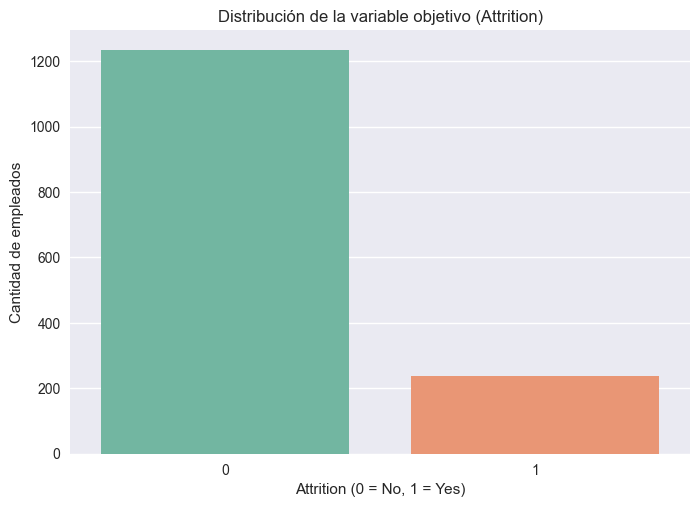

Procentaje de cada clase: Attrition
0    83.88
1    16.12
Name: proportion, dtype: float64


In [137]:
# --- Análisis del balance de clases ---
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Distribución de la variable objetivo (Attrition)')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Cantidad de empleados')
plt.show()

# Porcentaje de cada clase
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(f"Procentaje de cada clase: {attrition_rate.round(2)}")

## Identificación de variables numéricas y categóricas

Antes de avanzar con el análisis exploratorio, se identifican las variables numéricas y categóricas del dataset.  
Esto permitirá decidir qué tipo de visualizaciones y transformaciones aplicar en cada caso.

In [138]:
# --- Identificación de variables numéricas y categóricas ---

# Seleccionamos los nombres de las columnas según su tipo
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Variables numéricas:", len(num_cols))
print(num_cols.tolist())
print("\nVariables categóricas:", len(cat_cols))
print(cat_cols.tolist())

Variables numéricas: 26
['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Variables categóricas: 5
['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']


## Codificación de variables categóricas (One-Hot Encoding)

Algunas variables categóricas contienen más de dos categorías (por ejemplo, 
`BusinessTravel`, `Department`, `JobRole`, `MaritalStatus` o `EducationField`).  
Para que puedan ser utilizadas por los algoritmos de *Machine Learning*, se transforman 
mediante **One-Hot Encoding**, que crea una nueva columna por cada categoría posible, 
con valores binarios (`0` o `1`).  

Este paso convierte todas las variables categóricas en formato numérico, 
manteniendo la información original sin introducir un orden artificial entre las categorías.

In [139]:
# Selección de variables categóricas a codificar
X_cat = df[['BusinessTravel', 'EducationField', 'Department', 'JobRole', 'MaritalStatus']]

In [140]:
# Inicialización y transformación
ohe = OneHotEncoder()
X_cat_encoded = ohe.fit_transform(X_cat).toarray()

In [141]:
# Conversión a DataFrame con nombres de columnas legibles
X_cat_encoded = pd.DataFrame(
    X_cat_encoded, 
    columns=ohe.get_feature_names_out(X_cat.columns)
)

In [142]:
# Se conserva el mismo índice del DataFrame original
# para mantener alineadas las filas al concatenar.
X_cat_encoded.index = df.index

In [143]:
# --- Unión con el DataFrame original y eliminación de las columnas originales ---
df_encoded = pd.concat([df.drop(X_cat.columns, axis=1), X_cat_encoded], axis=1)

In [144]:
# Verificación final
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   int64

# 3. Análisis exploratorio de los datos (EDA)

En esta sección se analizan distribuciones, relaciones y patrones entre variables 
(numéricas y categóricas) con foco en su vínculo con **Attrition**.

## Correlación de las variables numéricas con Attrition

La correlación de las variables numéricas con la variable objetivo es baja en general,  
lo que sugiere que la rotación no depende de un solo factor cuantitativo,  
sino de la combinación de múltiples variables (numéricas y categóricas).

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
Gender                      0.029453
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64


C:\Users\elias\AppData\Local\Temp\ipykernel_3796\999904047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')


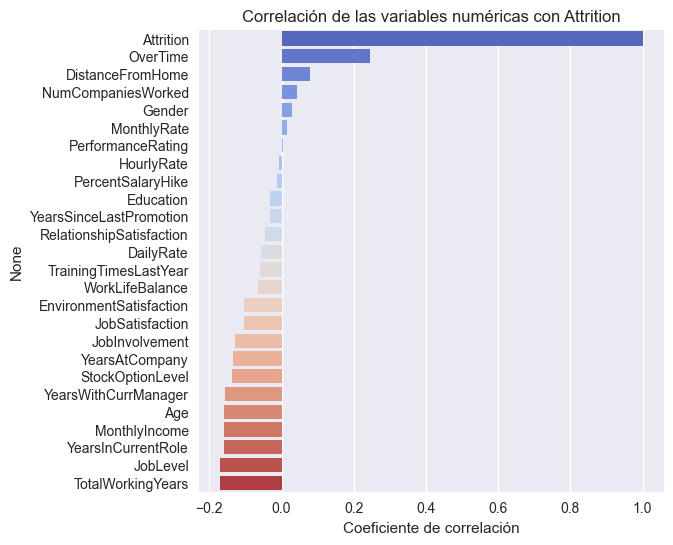

In [145]:
# --- Correlación de variables numéricas con Attrition ---
corr_target = df.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)
print(corr_target)

# Visualización más clara
plt.figure(figsize=(6,6))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')
plt.title('Correlación de las variables numéricas con Attrition')
plt.xlabel('Coeficiente de correlación')
plt.show()

Para mejorar la legibilidad, se seleccionaron las variables numéricas más relevantes en lugar de mostrar la matriz completa de correlaciones.  
Estas variables reflejan distintos aspectos del perfil laboral (edad, ingreso, antigüedad, promociones, distancia al trabajo) que podrían influir en la rotación del personal.

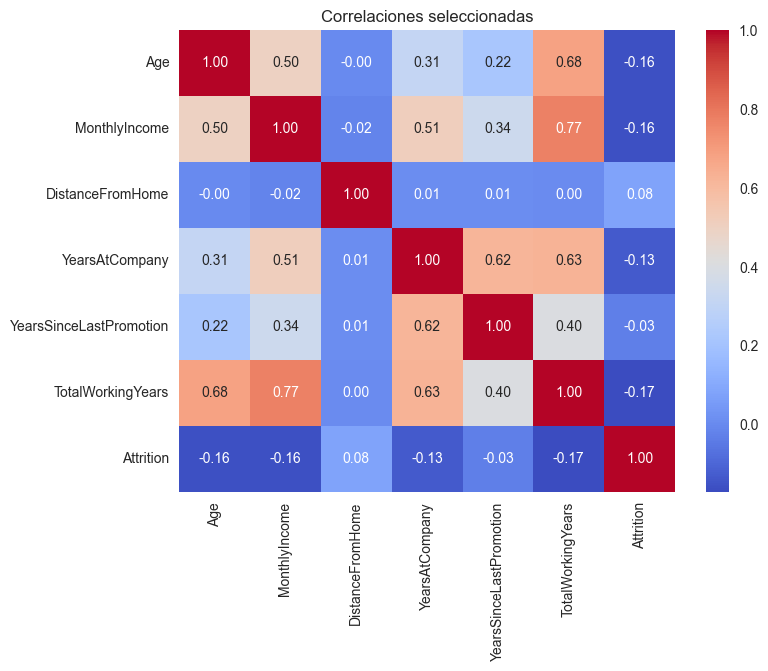

In [146]:
# --- Matriz de correlación de variables numéricas seleccionadas ---
num_focus = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany',
             'YearsSinceLastPromotion', 'TotalWorkingYears', 'Attrition']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_focus].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones seleccionadas')
plt.show()

## Análisis de variables categóricas
En esta sección se exploran las principales variables categóricas en relación con la variable objetivo **Attrition**, 
para detectar patrones de comportamiento o posibles factores asociados a la rotación del personal.

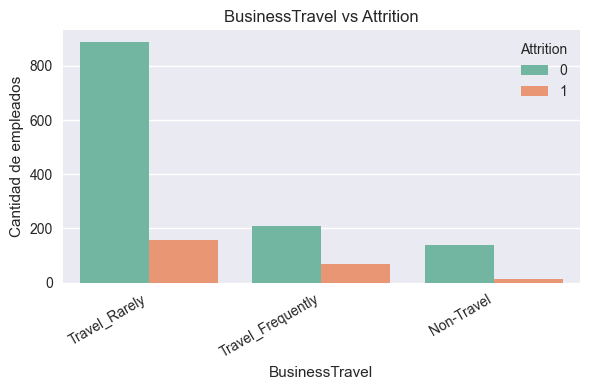

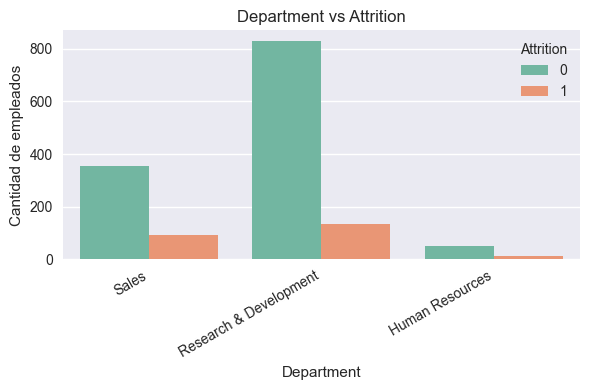

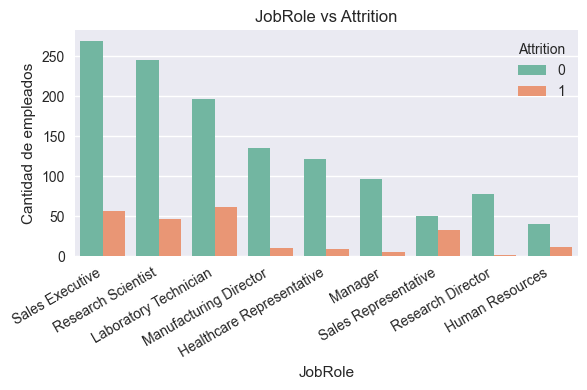

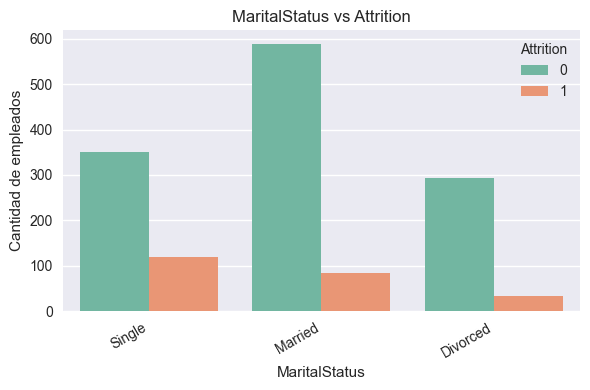

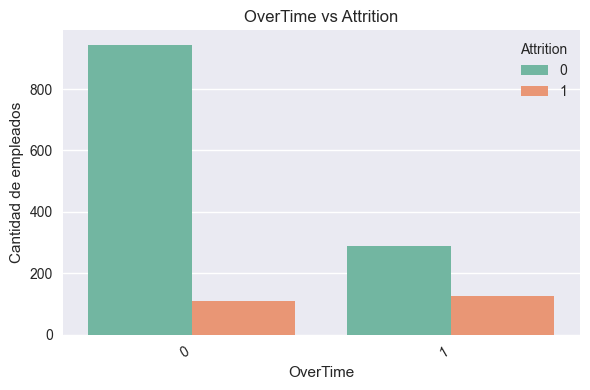

In [147]:
# --- Variables categóricas clave ---
cat_focus = ['BusinessTravel', 'Department', 'JobRole', 'MaritalStatus', 'OverTime']

for col in cat_focus:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Attrition', data=df, palette='Set2')
    plt.title(f'{col} vs Attrition')
    plt.xlabel(col)
    plt.ylabel('Cantidad de empleados')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

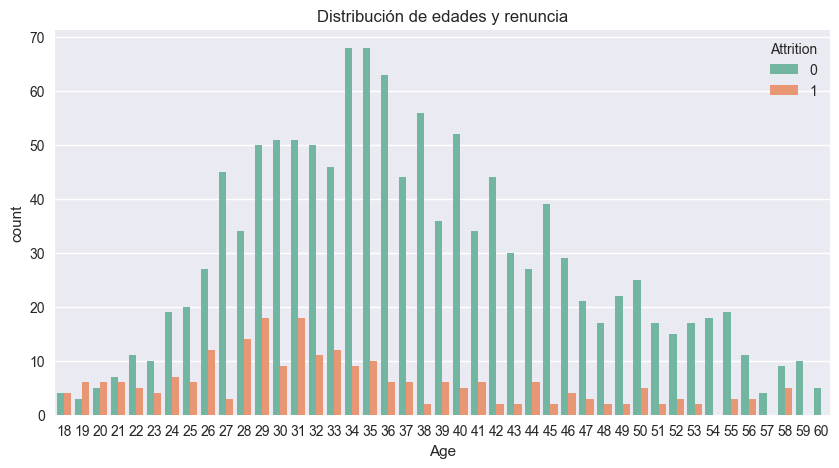

In [148]:
# Edad vs renuncia
plt.figure(figsize=(10,5))
sns.countplot(x='Age', hue='Attrition', data=df, palette='Set2')
plt.title('Distribución de edades y renuncia')
plt.show()

C:\Users\elias\AppData\Local\Temp\ipykernel_3796\1014307668.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition']==1]['DistanceFromHome'], label="Renuncian", color='r', shade=True)
C:\Users\elias\AppData\Local\Temp\ipykernel_3796\1014307668.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition']==0]['DistanceFromHome'], label="Permanecen", color='b', shade=True)


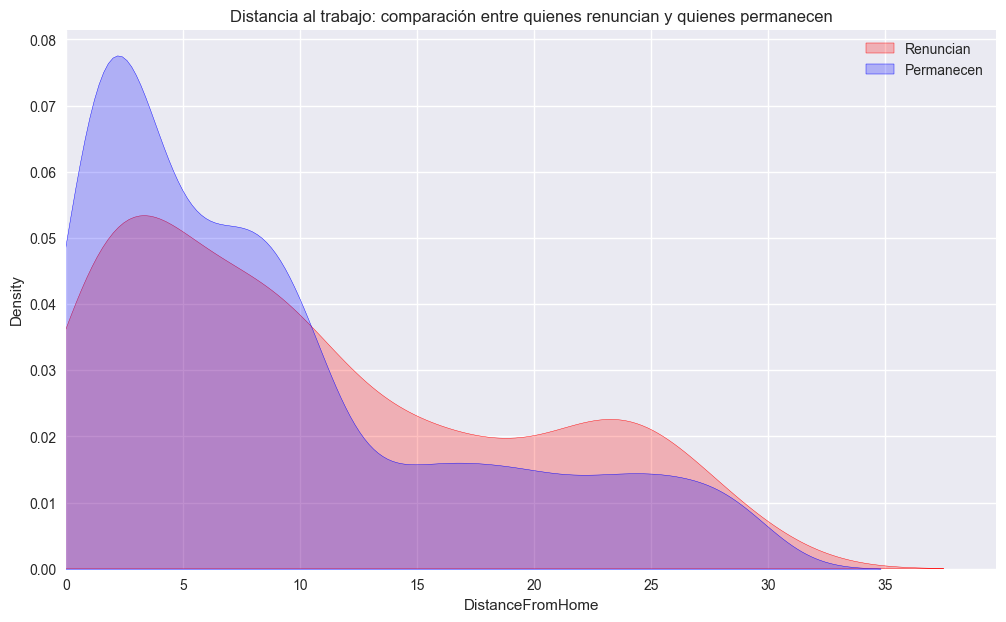

In [149]:
plt.figure(figsize=(12,7))
sns.kdeplot(df[df['Attrition']==1]['DistanceFromHome'], label="Renuncian", color='r', shade=True)
sns.kdeplot(df[df['Attrition']==0]['DistanceFromHome'], label="Permanecen", color='b', shade=True)
plt.title('Distancia al trabajo: comparación entre quienes renuncian y quienes permanecen')
plt.xlabel('DistanceFromHome')
plt.legend()
plt.xlim(0)
plt.show()

### Interpretación general de las variables

Se observan patrones claros en la relación entre las variables y la variable objetivo (**Attrition**),  
que representa la **renuncia del empleado** a la empresa:

- Los empleados que realizan **horas extra (`OverTime = Yes`)** presentan una tasa de **renuncia** significativamente mayor.  
- En cuanto a los **roles y departamentos**, se observa una mayor proporción de **renuncias** en ciertos puestos específicos, especialmente entre *Sales Executive*, *Laboratory Technician* y *Research Scientist*.  
  Esto sugiere que las funciones más operativas o de base presentan un **mayor nivel de abandono** que los cargos gerenciales.  
- El **estado civil** también muestra diferencias: los empleados **solteros** tienden a **renunciar** más que los casados o divorciados.  
- En relación con los **viajes laborales (`BusinessTravel`)**, quienes viajan con mayor frecuencia exhiben una **ligera tendencia** a dejar la empresa.  
- En las variables numéricas, los empleados **más jóvenes** presentan mayores tasas de renuncia, lo que podría asociarse a una menor estabilidad laboral o búsqueda de nuevas oportunidades.  
- La **distancia desde el hogar (`DistanceFromHome`)** muestra una leve diferencia: quienes viven más lejos tienden a **renunciar algo más**, aunque el efecto no es determinante.

Estos resultados indican que la **renuncia** de los empleados no depende de un único factor cuantitativo,  
sino de la **combinación de condiciones laborales y personales**, que en conjunto pueden aumentar la probabilidad de abandono.

## Síntesis del análisis exploratorio

El análisis exploratorio permitió identificar patrones tanto en variables numéricas como categóricas.  
Las correlaciones mostraron relaciones débiles entre las variables cuantitativas y la renuncia, lo que sugiere que el abandono de la empresa 
no depende de un único factor medible, sino de la combinación de aspectos laborales y personales.  
En las variables categóricas, destacan las tasas más altas de renuncia entre empleados con horas extra frecuentes, 
determinados puestos operativos y personas solteras.  
Estos hallazgos orientan las siguientes etapas de modelado predictivo, 
donde se evaluará qué variables contribuyen con mayor peso a predecir la probabilidad de renuncia.

# 4. Modelado predictivo

En esta etapa se construyen y evalúan distintos modelos de *Machine Learning* con el objetivo de 
**predecir la probabilidad de renuncia de un empleado** a partir de las variables disponibles.  

Se compararán varios enfoques de clasificación, comenzando con un **Árbol de Decisión**, 
seguido por un **Bosque Aleatorio (Random Forest)** y una **Regresión Logística**.  
Estos modelos permitirán analizar tanto el rendimiento predictivo como la importancia relativa de las variables.  

Antes del entrenamiento, se definen las variables predictoras (**X**) y la variable objetivo (**y**), 
y se realiza la **división del conjunto de datos** en entrenamiento y prueba, 
manteniendo la proporción de clases observada en el dataset original (*stratify*).

In [155]:
# --- Definición de variables predictoras y variable objetivo ---
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [156]:
# --- División en conjunto de entrenamiento y prueba ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [157]:
print(f"Tamaño de entrenamiento: {len(X_train)}")
print(f"Tamaño de prueba: {len(X_test)}")

Tamaño de entrenamiento: 1029
Tamaño de prueba: 441


## Árbol de Decisión

El modelo de **Árbol de Decisión** permite dividir los datos en función de reglas lógicas simples, 
identificando los factores que influyen en la probabilidad de renuncia.  
Se entrena el modelo utilizando el conjunto de entrenamiento y se evalúa su desempeño sobre el conjunto de prueba.

In [158]:
# --- Entrenamiento del modelo ---
# En esta primera ejecución no se incluye 'class_weight=balanced'
# para verificar que el flujo funcione correctamente.
# Luego podrá incorporarse si el desbalance de clases afecta el rendimiento.
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [159]:
# --- Predicciones sobre el conjunto de prueba ---
y_pred = model.predict(X_test)

In [161]:
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[310  60]
 [ 47  24]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       370
           1       0.29      0.34      0.31        71

    accuracy                           0.76       441
   macro avg       0.58      0.59      0.58       441
weighted avg       0.77      0.76      0.77       441

